In [536]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

###### Datas

In [537]:
X, y = make_classification(
    n_samples=100,
    n_features=1,
    n_informative=1,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.5,0.5],
    flip_y=0.15,
    class_sep=2.0,
    hypercube=True,
    shift=1.0,
    scale=1.0,
    shuffle=True,
    random_state=88
)

###### Reshape are necessary to work with scikit learn

In [538]:
# If you don't declare a 2D array explicitly, like with make...
# That's better to reshape you X datas on 2D array
X = X.reshape(-1, 1)

#### 1 - Plot the datas

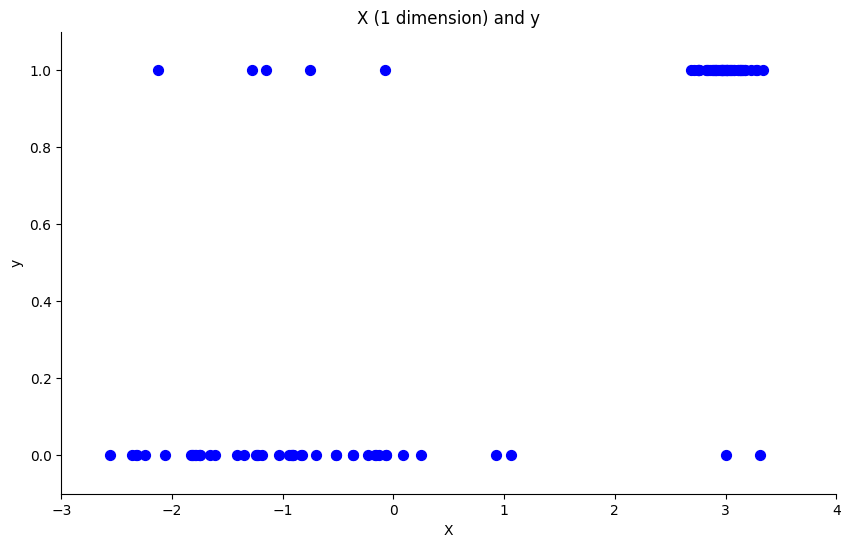

In [539]:
# First plot: Scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', s=50)
plt.title('X (1 dimension) and y')
plt.xlabel('X')
plt.ylabel('y')
plt.xlim(-3, 4)
plt.ylim(-0.1, 1.1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

#### 2 - Fit a Logistic Regression on the generated data using scikit learn. Print the coefficients and the interception of the Logistic Regression.

In [540]:
model = LogisticRegression().fit(X,y)
print(f"Coefficient: {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")

Coefficient: 1.1889
Intercept: -0.9850


#### 3 - Add to the previous plot the fitted sigmoid and the 0.5 probability line. The plot should look like this:

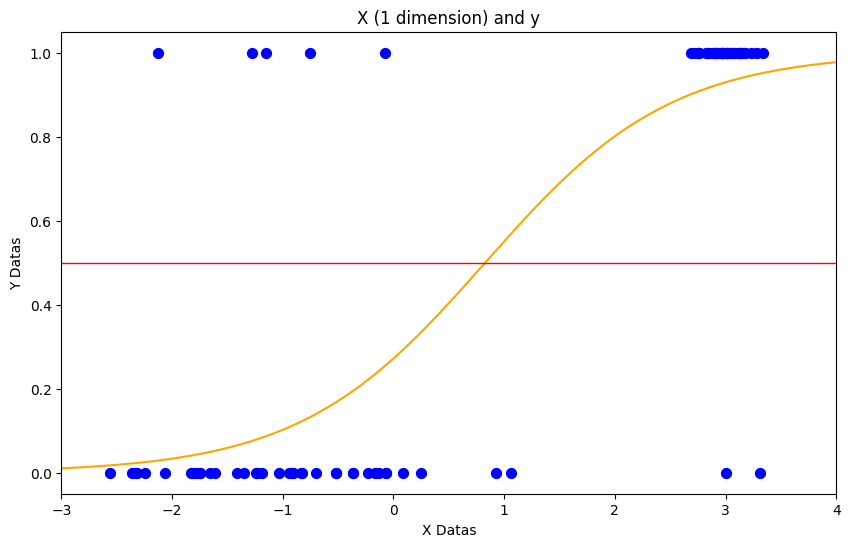

In [541]:
# Second plot: Data with fitted sigmoid
plt.figure(figsize=(10, 6))

# Scatter plot of the data
plt.scatter(X, y, color='blue', s=50)

# Add fitted sigmoid
X_plot = np.linspace(-3, 4, 300).reshape(-1, 1)
y_proba = model.predict_proba(X_plot)[:, 1]
plt.plot(X_plot, y_proba, color='orange')
# Add line probability line
plt.axhline(y=0.5, color='red', linewidth=1)

# Plot customisation
plt.title('X (1 dimension) and y')
plt.xlabel('X Datas')
plt.ylabel('Y Datas')
plt.xlim(-3, 4)

# Show the plot
plt.show()

#### 4 - Create a function predict_probability that takes as input the data point and the coefficients and that returns the predicted probability. As a reminder, the probability is given by: p(x) = 1/(1+ exp(-(coef*x + intercept))). Check you have the same results as the method predict_proba from Scikit-learn.

In [542]:
def predict_probability(coefs, X):
    # I need to have the coef and intercept
    coef, intercept = coefs
    # Create 2D array more efficient
    # atleast_2D don't create copy
    X = np.atleast_2d(X)
    z = np.dot(X, coef) + intercept
    probabilities = 1 / (1 + np.exp(-z))
    # Return 1D array, more easy for manipulate datas
    return probabilities.ravel()

coef = model.coef_[0]
intercept = model.intercept_[0]

predicted_probability = predict_probability([coef, intercept], X)
sklearn_probabilities = model.predict_proba(X)[:, 1]

print("First 10 probabilities from custom function:")
print(predicted_probability[:10])
print("\nFirst 10 probabilities from sklearn:")
print(sklearn_probabilities[:10])

# Tolerance absolute and relative = 5
np.testing.assert_allclose(predicted_probability, sklearn_probabilities, rtol=1e-5, atol=1e-5)

print(f"\nCoefficient: {coef[0]:.4f}")
print(f"Intercept: {intercept:.4f}")

First 10 probabilities from custom function:
[0.16838474 0.93807876 0.08040988 0.92079705 0.93517695 0.92542964
 0.07566453 0.11193493 0.93416244 0.94218311]

First 10 probabilities from sklearn:
[0.16838474 0.93807876 0.08040988 0.92079705 0.93517695 0.92542964
 0.07566453 0.11193493 0.93416244 0.94218311]

Coefficient: 1.1889
Intercept: -0.9850


#### 5 - Create a function predict_class that takes as input the data point and the coefficients and that returns the predicted class. Check you have the same results as the class method predict output on the same data.

In [543]:
def predict_class(coefs, X):
    probabilities = predict_probability(coefs, X)
    return (probabilities >= 0.5).astype(int)

predicted_class = predict_class([coef, intercept], X)
predicted_sklearn = model.predict(X)

print("First 20 predictions from predicted function:")
print(predicted_class[:20])
print("\nFirst 20 predictions from sklearn:")
print(predicted_sklearn[:20])

np.testing.assert_array_equal(predicted_class, predicted_sklearn)

print(f"\nCoefficient: {coef[0]:.4f}")
print(f"Intercept: {intercept:.4f}")

# Check coherence
accuracy = (predicted_class == y).mean()
print(f"\nAccuracy: {accuracy:.4f}")

First 20 predictions from predicted function:
[0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0]

First 20 predictions from sklearn:
[0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0]

Coefficient: 1.1889
Intercept: -0.9850

Accuracy: 0.9100


#### 6 - On the plot add the predicted class. The plot should look like this (the predicted class is shifted a bit to make the plot more understandable, but obviously the predicted class is 0 or 1, not 0.1 or 0.9) The plot should look like this:

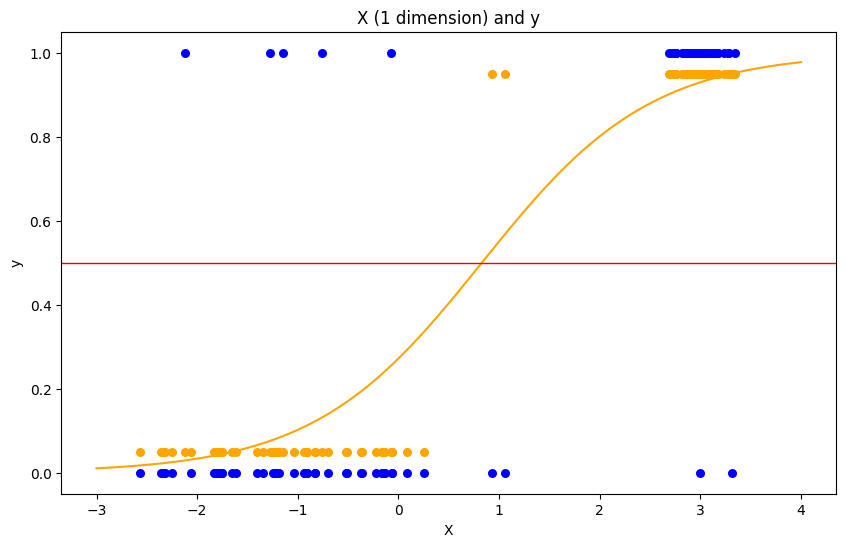

In [544]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', s=30)
plt.scatter(X, model.predict(X) * 0.9 + 0.05, color='orange', s=30)
X_plot = np.linspace(-3, 4, 300).reshape(-1, 1)
y_proba = model.predict_proba(X_plot)[:, 1]
plt.plot(X_plot, y_proba, color='orange')
plt.axhline(y=0.5, color='red', linestyle='-', linewidth=1)
plt.title('X (1 dimension) and y')
plt.xlabel('X')
plt.ylabel('y')
# Show the plot
plt.show()

#### 6bis - Now, let us repeat this process on 2-dimensional data. The goal is to focus on the decision boundary and to understand how the Logistic Regression create a line that separates the data. The code to plot the decision boundary is provided, however it is important to understand the way it works.

In [545]:
X, y = make_classification(n_features=2,
                           n_redundant=0,
                           n_samples=250,
                           n_classes=2,
                           n_clusters_per_class=1,
                           flip_y=0.05,
                           class_sep=3,
                           random_state=43)

clf = LogisticRegression().fit(X, y)

# Create a grid of points
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]

# Predict probabilities for the grid
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

##### Plot the decision boundary

NameError: name 'y_pred_proba' is not defined

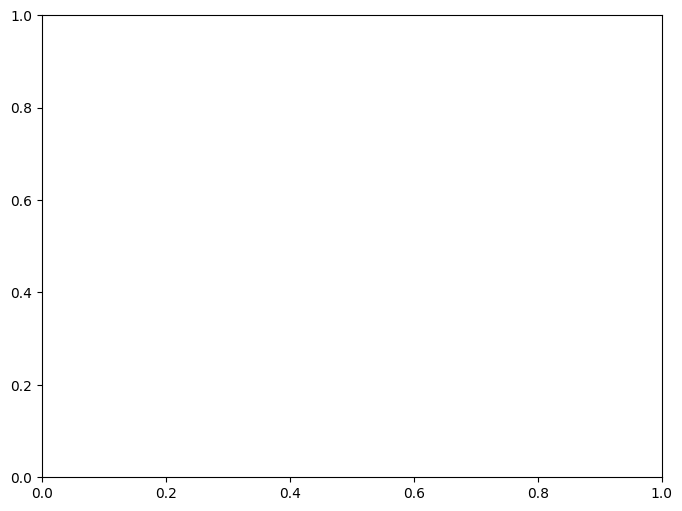

In [546]:

f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu", vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y, s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

plt.title("Logistic Regression Decision Boundary")
plt.show()